# Quantum Memory Simulations

This notebook is the python command center for executing XMDS2 simulation code and for visualizing the simulation results.  The most reliable way run these simulations is via the docker image with xmds and the python packages installed.  

Otherwise, you can set up your own system to be able to run these simulations:

As XMDS2 runs natively in Linux and Mac OS, just initiate the kernel for this notebook as usual via anaconda or your own python installation.  For Windows users, you can execute your XMDS2 code in either a virtual box or using a Linux bash shell such as Bash on Ubuntu on Windows.  Just make sure you initiate your notebook kernel in the same environment so it can run the XMDS executable.


If you would like to build your own system to run it, you can set up your jupyter notebook install to run these scripts:

(Recommended): Set up a python virtual environment at the directory with the XMDS code and install all the relevant libraries in it.  Instructions: https://janakiev.com/blog/jupyter-virtual-envs/

Initiate your virtual environment using
>source virtualenv/bin/activate

where 'virtualenv' is your virtual environment folder

Once in your virtual environment, start jupyter notebook by typing in command line
>jupyter notebook

You're good to go!





Before running the executable, you need to first run your XMDS2 code in command line to generate the executable for this notebook to use.  If your XMDS2 code is named test.xmds then in command line you do:

> xmds2 test.xmds

If compiled successfully, it will prompt you to execute your program.  For example at the end of compilation:

> Compiling simulation...
... done. Type './test' to run.

Type that in to run and your executable should be generated:

> ./test

Make sure this notebook is in the same folder as your XMDS2 code.  

In [2]:
# Importing all libraries
import subprocess
import h5py
import numpy as np
from matplotlib import pyplot as plt
import xml.dom.minidom as xmlmd

#Function for passing user determined parameters to be executed in simulation
def set_params(xml_args, arg_dict):
    for k in arg_dict.keys():
        for arg in xml_args:
            arg_name = arg.getAttribute("name")
            if arg_name == k:
                arg.setAttribute("default_value", arg_dict[k])

# 1D 2-level GEM simulation

In [62]:
# Generating, compiling and running the simulation 

# Indicate the name of the xmds file you would like to run (without the .xmds extension)
file = '1DGEM2L'

# Setting the simulation parameters; these should match the name of parameters defined in the <arguments> of the xmds code
arg_dict = {'tin'       :'27' ,
            'pulsewidth':'6' ,
            'bandwidth' :'4'   ,
            'omega_in'  :'18' 
            }
# Open xml for parsing
doc = xmlmd.parse('./' + file + '.xmds')

# Get all arguments
args = doc.getElementsByTagName('argument')

# Set the new parameters
set_params(args, arg_dict)

# Open the file and write it
new_file = open('./sim_files/' + file + '.xmds', 'w+')
doc.writexml(new_file)
new_file.close()

# Running the xmds code
print('Generating simulation code...', end='')
subprocess.run(['xmds2', './sim_files/' + file + '.xmds'], capture_output=True);
print(' Done.')
print('Running the simulation...', end='')
subprocess.run(['./' + file], capture_output=True, timeout=100);
print(' Done.')

Generating simulation code... Done.
Running the simulation... Done.


Efficiency: 0.9997252074077607


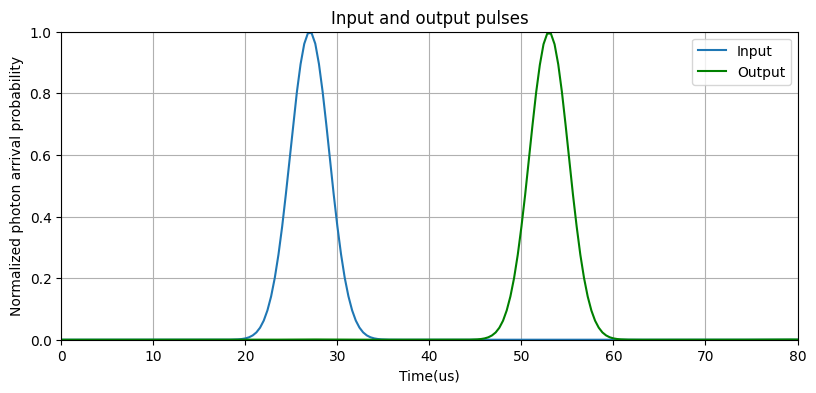

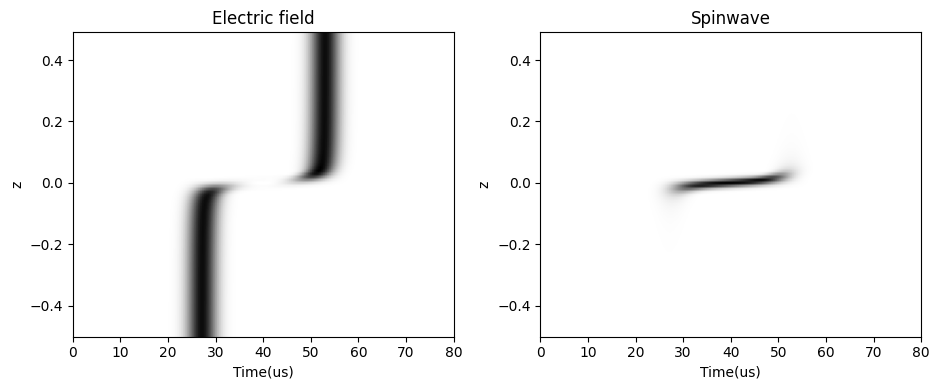

In [96]:
# Extracting and plotting simulation results from the h5 output file

# Indicate name of simulation h5 output file
f = h5py.File('1DGEM2L.h5', 'r')

# Get the spinwave array 
S_array = np.zeros(f['1']['SI'].shape, dtype=complex)
S_array.real = f['1']['SR']
S_array.imag = f['1']['SI']

# Get the electric field array 
E_array = np.zeros(f['1']['EI'].shape, dtype=complex)
E_array.real = f['1']['ER']
E_array.imag = f['1']['EI']

# Get the time and position vectors
t = np.array(f['1']['t'])
z = np.array(f['1']['z'])
f.close()


# Get the input and output pulses to calculate efficiency
in_pulse = np.trapz((np.abs(E_array)**2)[:, 0])
out_pulse = np.trapz((np.abs(E_array)**2)[:, -1])
print('Efficiency: %s' % (out_pulse/in_pulse))

# Plot the input and output pulses
fig1, ax1 = plt.subplots(figsize=(9.5,4))
ax1.plot(t,(np.abs(E_array)**2)[:,0],label="Input")
ax1.plot(t,(np.abs(E_array)**2)[:,-1],'g',label="Output")
ax1.set_xlim(0,80)
ax1.set_ylim(0,1)
ax1.set_xlabel('Time(us)')
ax1.set_ylabel('Normalized photon arrival probability')
ax1.title.set_text('Input and output pulses')
ax1.grid()
ax1.legend()

# 2D plot the electric and spinwave fields in space and time:
fig2, (ax2,ax3) = plt.subplots(1,2,figsize=(9.5,4))
ax2.imshow(np.flip(np.transpose(np.abs(E_array)),0)**2,cmap='gray_r', 
           extent=[t[0],t[-1],z[0],z[-1]],
           aspect='auto')
ax2.set_xlabel('Time(us)')
ax2.set_ylabel('z')
ax2.title.set_text('Electric field')
ax3.imshow(np.flip(np.transpose(np.abs(S_array)),0)**2,cmap='gray_r', 
           extent=[t[0],t[-1],z[0],z[-1]],
           aspect='auto')
ax3.set_xlabel('Time(us)')
ax3.set_ylabel('z')
ax3.title.set_text('Spinwave')

plt.tight_layout()
plt.show()

# 1D 3-level GEM simulation

In [37]:
# Generating, compiling and running the simulation 

# Indicate the name of the xmds file you would like to run (without the .xmds extension)
file = '1DGEM3L'

# Setting the simulation parameters; these should match the name of parameters defined in the <arguments> of the xmds code
arg_dict = {'tin'       :'27' ,
            'pulsewidth':'6' ,
            'bandwidth' :'5'   ,
            'omega_in'  :'10'   ,
            'delta_in'  :'-220' ,
            'od'        :'600',
            'acstark_compensated':'1'
            }
# Open xml for parsing
doc = xmlmd.parse('./' + file + '.xmds')

# Get all arguments
args = doc.getElementsByTagName('argument')

# Set the new parameters
set_params(args, arg_dict)

# Open the file and write it
new_file = open('./sim_files/' + file + '.xmds', 'w+')
doc.writexml(new_file)
new_file.close()

# Running the xmds code
print('Generating simulation code...', end='')
subprocess.run(['xmds2', './sim_files/' + file + '.xmds'], capture_output=True);
print(' Done.')
print('Running the simulation...', end='')
subprocess.run(['./' + file], capture_output=True, timeout=100);
print(' Done.')

Generating simulation code... Done.
Running the simulation... Done.


Efficiency: 0.18912750797036718


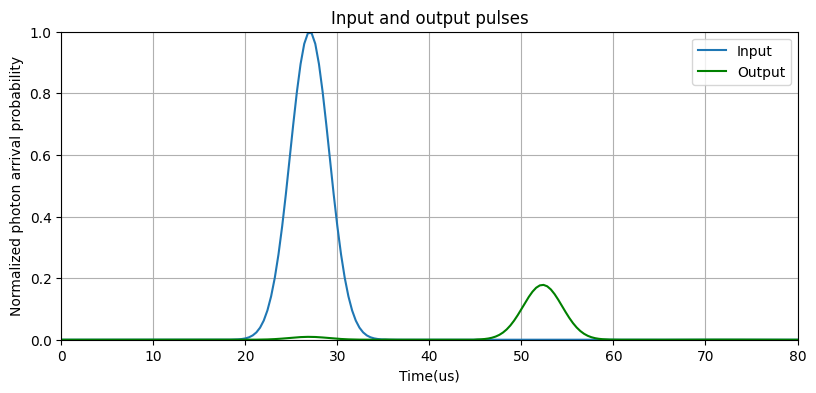

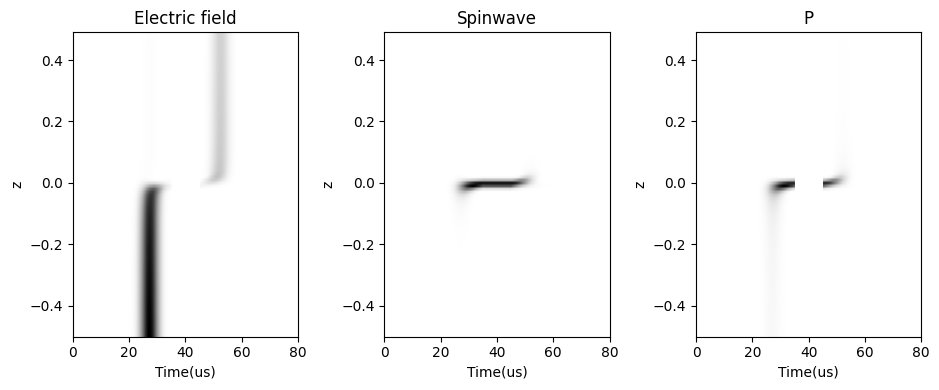

In [40]:
# Extracting and plotting simulation results from the h5 output file

# Indicate name of simulation h5 output file
f = h5py.File('1DGEM3L.h5', 'r')

# Get the spinwave array 
S_array = np.zeros(f['1']['SI'].shape, dtype=complex)
S_array.real = f['1']['SR']
S_array.imag = f['1']['SI']

# get the P array 
P_array = np.zeros(f['1']['PI'].shape, dtype=complex)
P_array.real = f['1']['PR']
P_array.imag = f['1']['PI']

# Get the electric field array 
E_array = np.zeros(f['1']['EI'].shape, dtype=complex)
E_array.real = f['1']['ER']
E_array.imag = f['1']['EI']

# Get the time and position vectors
t = np.array(f['1']['t'])
z = np.array(f['1']['z'])
f.close()


# Get the input and output pulses to calculate efficiency
in_pulse = np.trapz((np.abs(E_array)**2)[:, 0])
out_pulse = np.trapz((np.abs(E_array)**2)[:, -1])
print('Efficiency: %s' % (out_pulse/in_pulse))

# Plot the input and output pulses
fig1, ax1 = plt.subplots(figsize=(9.5,4))
ax1.plot(t,(np.abs(E_array)**2)[:,0],label="Input")
ax1.plot(t,(np.abs(E_array)**2)[:,-1],'g',label="Output")
ax1.set_xlim(0,80)
ax1.set_ylim(0,1)
ax1.set_xlabel('Time(us)')
ax1.set_ylabel('Normalized photon arrival probability')
ax1.title.set_text('Input and output pulses')
ax1.grid()
ax1.legend()

# 2D plot the electric and spinwave fields in space and time:
fig2, (ax2,ax3,ax4) = plt.subplots(1,3,figsize=(9.5,4))
ax2.imshow(np.flip(np.transpose(np.abs(E_array)),0)**2,cmap='gray_r', 
           extent=[t[0],t[-1],z[0],z[-1]],
           aspect='auto')
ax2.set_xlabel('Time(us)')
ax2.set_ylabel('z')
ax2.title.set_text('Electric field')
ax3.imshow(np.flip(np.transpose(np.abs(S_array)),0)**2,cmap='gray_r', 
           extent=[t[0],t[-1],z[0],z[-1]],
           aspect='auto')
ax3.set_xlabel('Time(us)')
ax3.set_ylabel('z')
ax3.title.set_text('Spinwave')
ax4.imshow(np.flip(np.transpose(np.abs(P_array)),0)**2,cmap='gray_r', 
           extent=[t[0],t[-1],z[0],z[-1]],
           aspect='auto')
ax4.set_xlabel('Time(us)')
ax4.set_ylabel('z')
ax4.title.set_text('P')

plt.tight_layout()
plt.show()